In [52]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk 
import seaborn as sns 



#### Loading Data

In [53]:
#Reading dataset

df_fhs = pd.read_csv('C:/Users/ACER/OneDrive/Documents/Masters/ICBT_MSc_DS/Lecs/Dissertation/Dissertation Project/HDP/Dataset/framingham.csv')

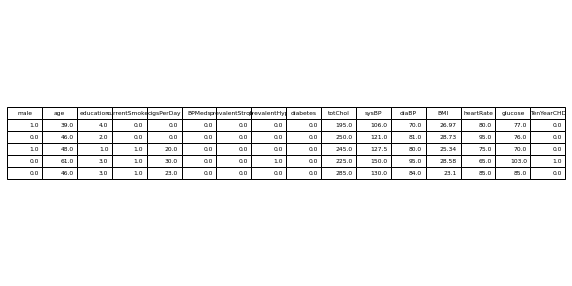

In [54]:
df_fhs.head()

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=df_fhs.head().values, colLabels=df_fhs.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(6)

plt.savefig('table.png', dpi=300, bbox_inches='tight')

In [55]:
#datatypes

df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


#### Data Cleaning

In [56]:
#Basic description of the data
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_fhs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.000,0.429,0.495,0.000,0.000,0.000,1.000,1.000
age,4240.000,49.580,8.573,32.000,42.000,49.000,56.000,70.000
education,4135.000,1.979,1.020,1.000,1.000,2.000,3.000,4.000
currentSmoker,4240.000,0.494,0.500,0.000,0.000,0.000,1.000,1.000
cigsPerDay,4211.000,9.006,11.922,0.000,0.000,0.000,20.000,70.000
BPMeds,4187.000,0.030,0.170,0.000,0.000,0.000,0.000,1.000
prevalentStroke,4240.000,0.006,0.077,0.000,0.000,0.000,0.000,1.000
prevalentHyp,4240.000,0.311,0.463,0.000,0.000,0.000,1.000,1.000
diabetes,4240.000,0.026,0.158,0.000,0.000,0.000,0.000,1.000
totChol,4190.000,236.700,44.591,107.000,206.000,234.000,263.000,696.000


In [57]:
#Filtering Dataset
df_fhs = df_fhs.drop(['education'], axis=1)

In [58]:
df_fhs.shape

(4240, 15)

In [59]:
#Find missing values
df_fhs.isnull()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
#Number of as a persentage of missing values in each column
df_fhs.isnull().sum()/len(df_fhs)*100

male              0.000
age               0.000
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            1.250
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.179
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
glucose           9.151
TenYearCHD        0.000
dtype: float64

In [61]:
#Dropping rows with less than 10% missigness
df_fhs = df_fhs.dropna()

In [62]:
df_fhs.isnull().sum()/len(df_fhs)*100

male              0.000
age               0.000
currentSmoker     0.000
cigsPerDay        0.000
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.000
heartRate         0.000
glucose           0.000
TenYearCHD        0.000
dtype: float64

In [63]:
#Check for duplicate values
df_fhs.duplicated().sum()

0

#### Data Transformation

In [64]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3751 non-null   int64  
 1   age              3751 non-null   int64  
 2   currentSmoker    3751 non-null   int64  
 3   cigsPerDay       3751 non-null   float64
 4   BPMeds           3751 non-null   float64
 5   prevalentStroke  3751 non-null   int64  
 6   prevalentHyp     3751 non-null   int64  
 7   diabetes         3751 non-null   int64  
 8   totChol          3751 non-null   float64
 9   sysBP            3751 non-null   float64
 10  diaBP            3751 non-null   float64
 11  BMI              3751 non-null   float64
 12  heartRate        3751 non-null   float64
 13  glucose          3751 non-null   float64
 14  TenYearCHD       3751 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.9 KB


<AxesSubplot:>

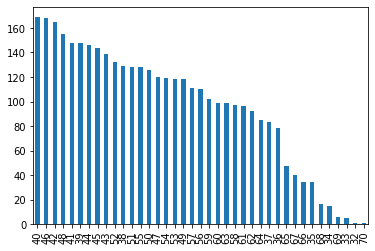

In [65]:
df_fhs['age'].value_counts().plot(kind='bar')

In [66]:
#Importing LableEncoder from sklearn library from preprosessing module
from sklearn.preprocessing import LabelEncoder

In [67]:
#creating a instance of lableencoder
lable_en = LabelEncoder()

In [68]:
#Finding categories
df_fhs['BMI'].value_counts()

23.480    18
22.540    16
25.090    15
22.910    15
22.190    15
          ..
35.220     1
21.000     1
30.110     1
33.450     1
20.910     1
Name: BMI, Length: 1307, dtype: int64

In [69]:
df_fhs['BMI'] = lable_en.fit_transform(df_fhs['BMI'])
df_fhs['BMI'].value_counts()

399     18
319     16
547     15
348     15
291     15
        ..
1219     1
197      1
981      1
1168     1
190      1
Name: BMI, Length: 1307, dtype: int64

In [70]:
# Renaming TenYearCHD to CHD
df_fhs.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [71]:
df_fhs.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1,39,0,0.000,0.000,0,0,0,195.000,106.000,70.000,722,80.000,77.000,0
1,0,46,0,0.000,0.000,0,0,0,250.000,121.000,81.000,869,95.000,76.000,0
2,1,48,1,20.000,0.000,0,0,0,245.000,127.500,80.000,570,75.000,70.000,0
3,0,61,1,30.000,0.000,0,1,0,225.000,150.000,95.000,856,65.000,103.000,1
4,0,46,1,23.000,0.000,0,0,0,285.000,130.000,84.000,364,85.000,85.000,0


#### Exploratory Data Analysis (EDA)

In [72]:
#Target variable
df_fhs['CHD'].value_counts(normalize=True)

0   0.848
1   0.152
Name: CHD, dtype: float64

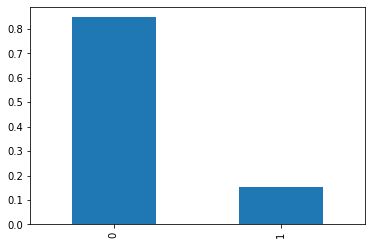

In [73]:
df_fhs['CHD'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [74]:
# Renaming male to Gender
df_fhs.rename(columns={"male": "Gender"}, inplace=True)
df_fhs.head()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1,39,0,0.000,0.000,0,0,0,195.000,106.000,70.000,722,80.000,77.000,0
1,0,46,0,0.000,0.000,0,0,0,250.000,121.000,81.000,869,95.000,76.000,0
2,1,48,1,20.000,0.000,0,0,0,245.000,127.500,80.000,570,75.000,70.000,0
3,0,61,1,30.000,0.000,0,1,0,225.000,150.000,95.000,856,65.000,103.000,1
4,0,46,1,23.000,0.000,0,0,0,285.000,130.000,84.000,364,85.000,85.000,0


In [75]:
#Getting the mean values for both Genders (Male-1, Female-0)
df_fhs.groupby('Gender').mean()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
Gender,,,,,,,,,,,,,,
0,49.759,0.397,5.528,0.038,0.006,0.310,0.025,239.629,133.247,82.363,566.623,76.940,81.813,0.122
1,49.343,0.602,13.346,0.020,0.005,0.314,0.029,233.562,131.273,83.656,634.707,74.163,81.963,0.191


In [76]:
#Getting the mean values only for CHD for both Genders (Male-1, Female-0)
df_fhs.groupby('Gender')['CHD'].mean()

Gender
0   0.122
1   0.191
Name: CHD, dtype: float64

<AxesSubplot:xlabel='Gender'>

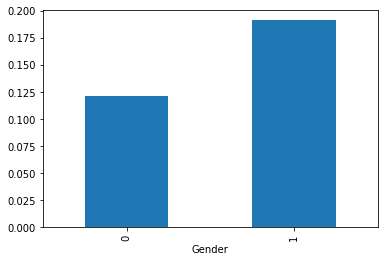

In [77]:
df_fhs.groupby('Gender')['CHD'].mean().plot(kind='bar')

In [78]:
df_fhs['Gender_Cat'] = df_fhs['Gender'].replace([0,1],['Female','Male'])
df_fhs.groupby('Gender_Cat')['CHD'].mean()

Gender_Cat
Female   0.122
Male     0.191
Name: CHD, dtype: float64

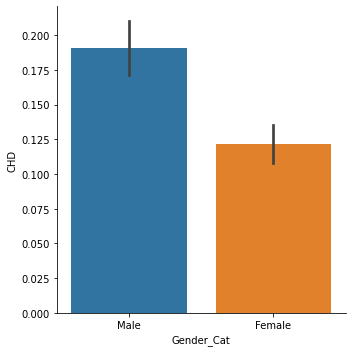

In [79]:
sns.catplot(data=df_fhs, y='CHD', x='Gender_Cat', kind='bar')
plt.show()

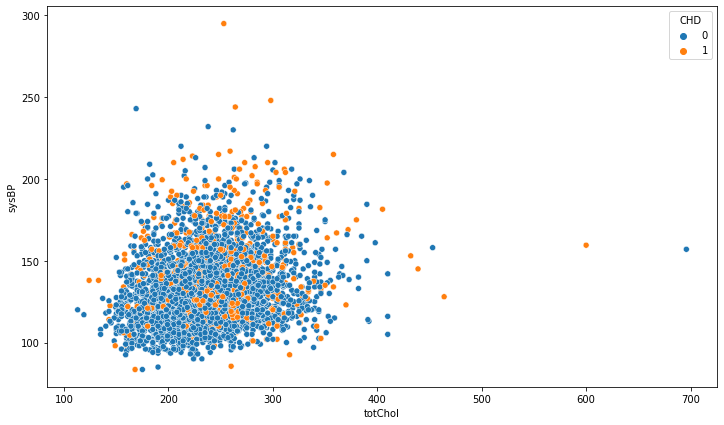

In [80]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df_fhs, y='sysBP', x='totChol', hue='CHD')
plt.show()

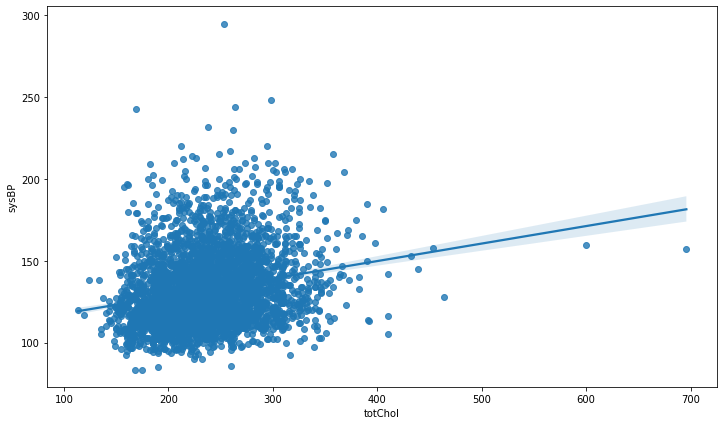

In [81]:
plt.figure(figsize=(12,7))
sns.regplot(data=df_fhs, y='sysBP', x='totChol')
plt.show()

In [82]:
df_fhs.nunique().sort_values()

Gender                2
currentSmoker         2
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
CHD                   2
Gender_Cat            2
cigsPerDay           33
age                  39
heartRate            72
glucose             141
diaBP               142
sysBP               231
totChol             242
BMI                1307
dtype: int64

In [83]:
#creating a separate subset
col_int = df_fhs.nunique().reset_index()
col_int

,index,0
0,Gender,2
1,age,39
2,currentSmoker,2
3,cigsPerDay,33
4,BPMeds,2
5,prevalentStroke,2
6,prevalentHyp,2
7,diabetes,2
8,totChol,242
9,sysBP,231


##### Type Casting Categorical varibales

In [84]:
#changing all the data types to integers
col_int.columns=['features', 'categories']
col_int['categories'] = col_int['categories'].astype('int64')

In [85]:
#sort columns based on number of unique values
col_int = col_int.sort_values(by='categories')
col_int = col_int[col_int.categories<10]
col_int.features.values

array(['Gender', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'CHD', 'Gender_Cat'], dtype=object)

In [86]:
#Display subset of int-type categorical variable
fhs_cat = df_fhs[col_int.features.values]
fhs_cat

,Gender,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,CHD,Gender_Cat
0,1,0,0.000,0,0,0,0,Male
1,0,0,0.000,0,0,0,0,Female
2,1,1,0.000,0,0,0,0,Male
3,0,1,0.000,0,1,0,1,Female
4,0,1,0.000,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4233,1,1,0.000,0,1,0,1,Male
4234,1,1,0.000,0,0,0,0,Male
4237,0,0,0.000,0,0,0,0,Female
4238,1,0,0.000,0,1,0,0,Male


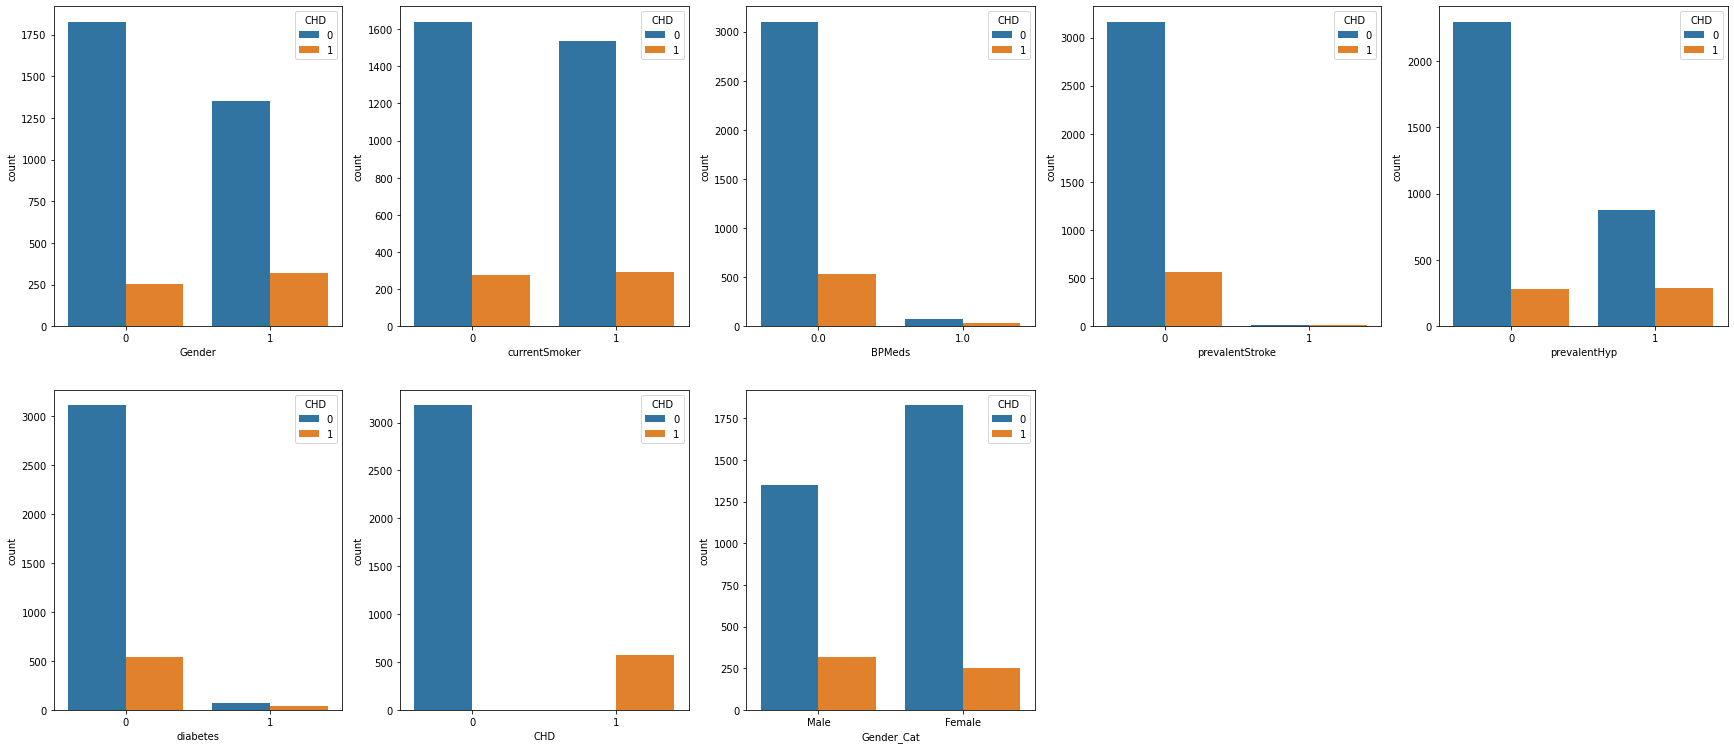

In [87]:
plt.figure(figsize=(30,20))
for i in enumerate(fhs_cat.columns):
    plt.subplot(3,5, i[0]+1)
    sns.countplot(x=i[1], hue='CHD', data=fhs_cat)

##### Cont. Variables

In [88]:
#Filer out a subset of categorical variables
fhs_cont = df_fhs.select_dtypes(include=['float'])
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751 entries, 0 to 4239
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  3751 non-null   float64
 1   BPMeds      3751 non-null   float64
 2   totChol     3751 non-null   float64
 3   sysBP       3751 non-null   float64
 4   diaBP       3751 non-null   float64
 5   heartRate   3751 non-null   float64
 6   glucose     3751 non-null   float64
dtypes: float64(7)
memory usage: 234.4 KB


In [89]:
#Correlation
fhs_cont.corr()

,cigsPerDay,BPMeds,totChol,sysBP,diaBP,heartRate,glucose
cigsPerDay,1.000,-0.047,-0.031,-0.092,-0.056,0.067,-0.055
BPMeds,-0.047,1.000,0.090,0.269,0.199,0.010,0.052
totChol,-0.031,0.090,1.000,0.216,0.170,0.095,0.047
sysBP,-0.092,0.269,0.216,1.000,0.786,0.181,0.133
diaBP,-0.056,0.199,0.170,0.786,1.000,0.175,0.062
heartRate,0.067,0.010,0.095,0.181,0.175,1.000,0.100
glucose,-0.055,0.052,0.047,0.133,0.062,0.100,1.000


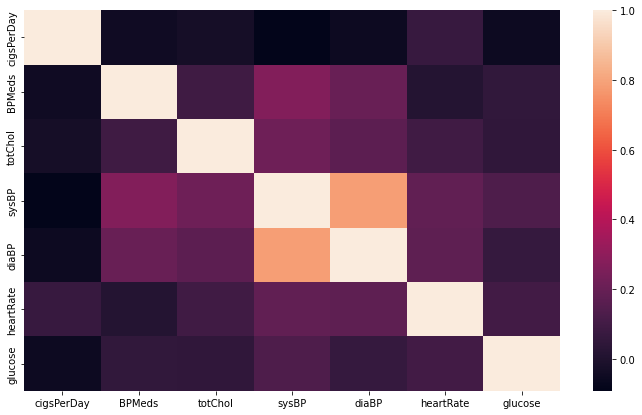

In [90]:
plt.figure(figsize=(12, 7))
sns.heatmap(fhs_cont.corr())
plt.show()

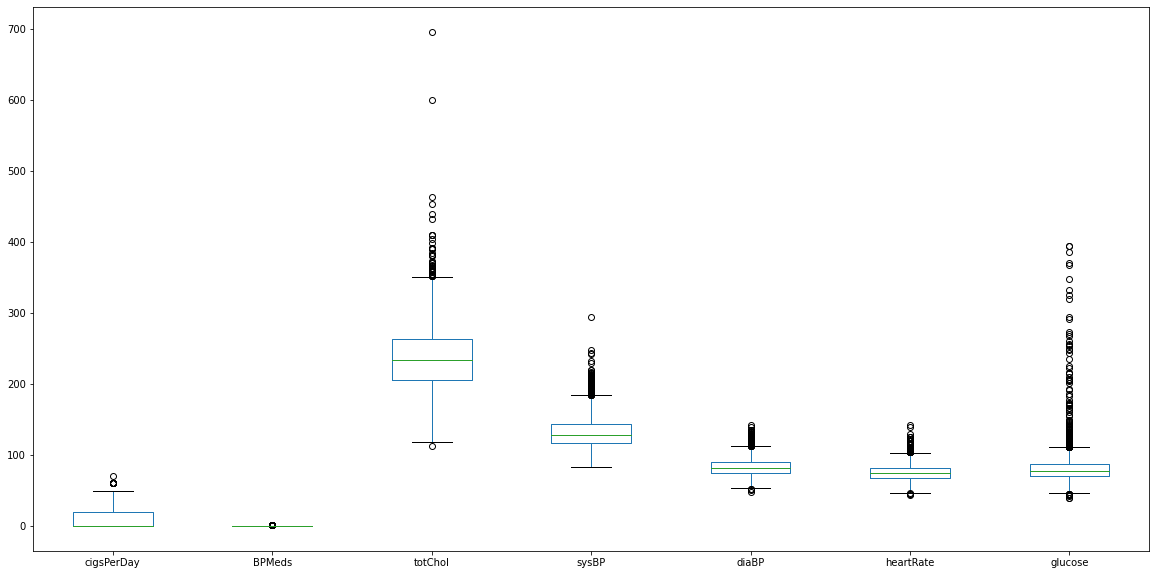

In [91]:
plt.figure(figsize=(20, 10))
fhs_cont.boxplot(grid=False)
plt.show()

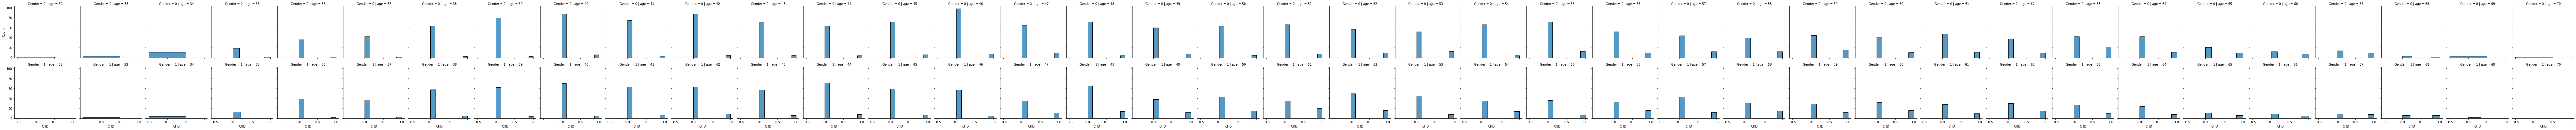

In [92]:
g = sns.FacetGrid(df_fhs, row='Gender', col='age')
g.map(sns.histplot, "CHD")
plt.tight_layout()

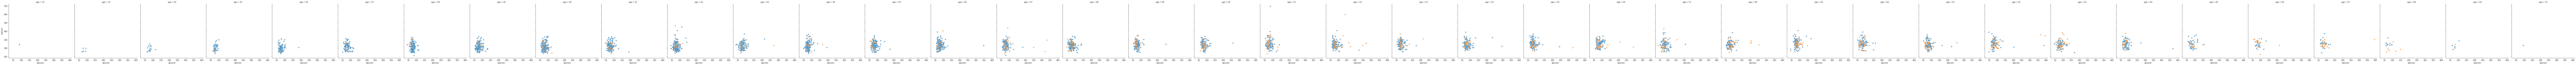

In [93]:
g = sns.FacetGrid(df_fhs, hue='CHD', col='age', height=5)
g.map(sns.scatterplot, "glucose", "totChol")
plt.tight_layout()

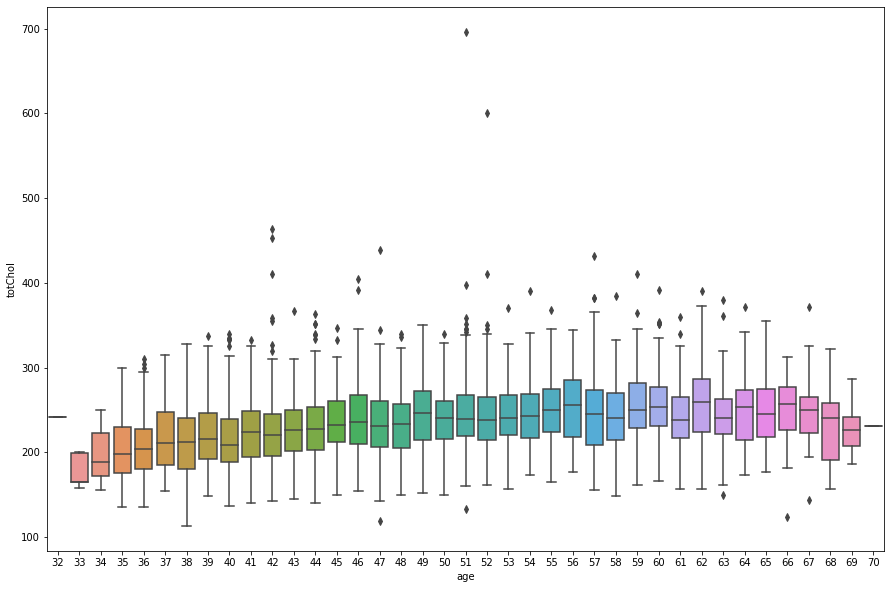

In [94]:
#instead of series of map we could do the following:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_fhs, x='age', y='totChol', ax=ax)
plt.show()

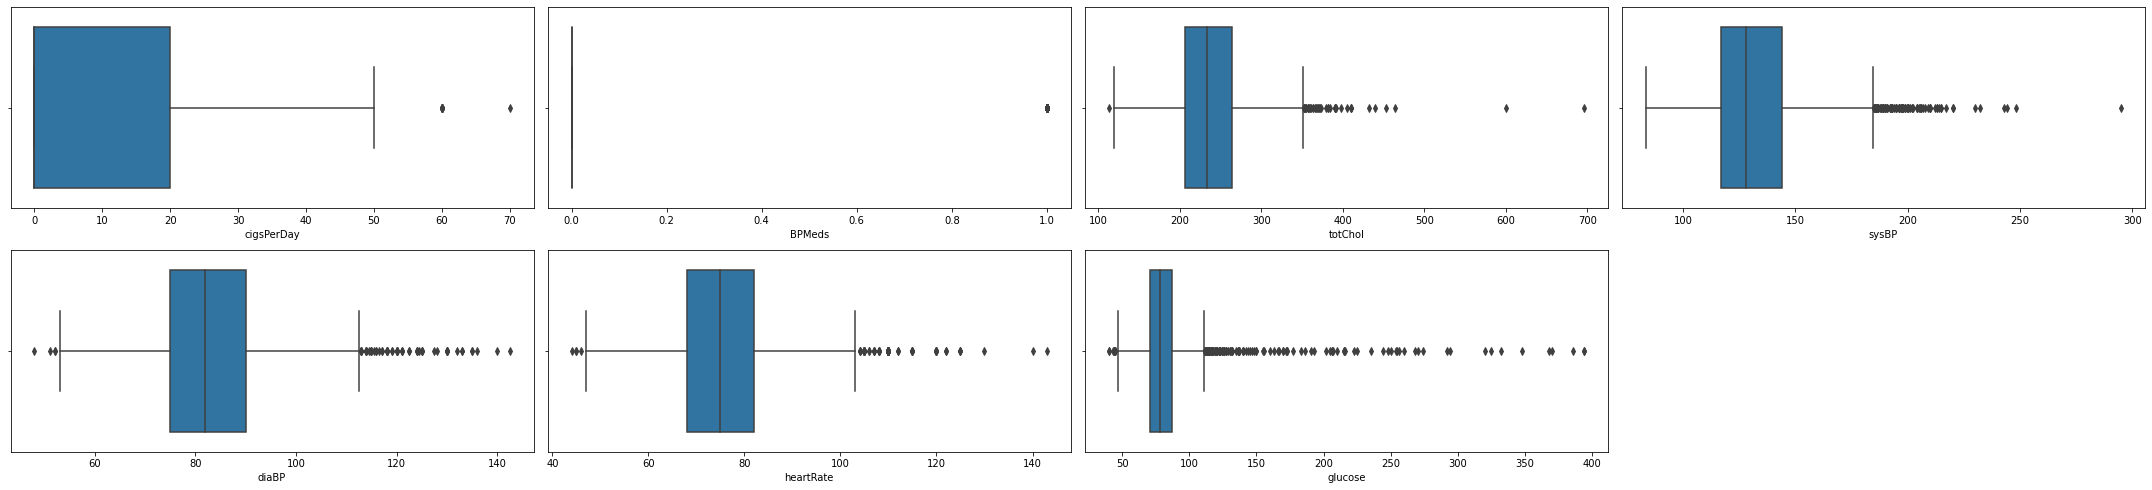

In [95]:
plt.figure(figsize=(30,20))
for i in enumerate(fhs_cont.columns):
    plt.subplot(6,4, i[0]+1)
    sns.boxplot(x=i[1], data=fhs_cont)
plt.tight_layout()

### Generating ML Model

#### Imbalance in the target variable


In [96]:
# Distribution in the target variable
df_fhs['CHD'].value_counts(normalize=True)

0   0.848
1   0.152
Name: CHD, dtype: float64

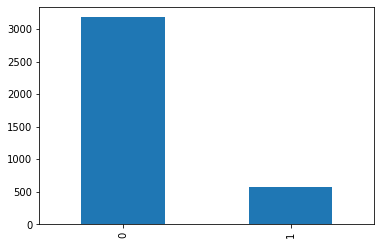

In [97]:
#Visualizing the distribution of the traget variable
df_fhs['CHD'].value_counts().plot(kind='bar')
plt.show()

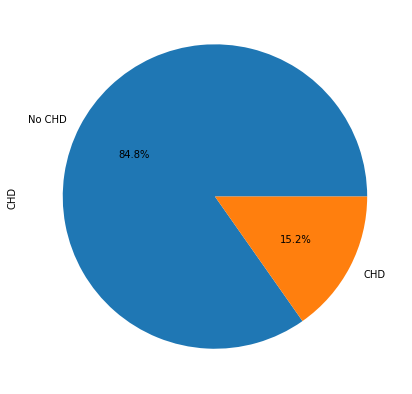

In [98]:
plt.figure(figsize=(10,7))
df_fhs['CHD'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No CHD', 'CHD'])
plt.show()

#### 1st Spliting (into x & y)

In [99]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751 entries, 0 to 4239
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  3751 non-null   float64
 1   BPMeds      3751 non-null   float64
 2   totChol     3751 non-null   float64
 3   sysBP       3751 non-null   float64
 4   diaBP       3751 non-null   float64
 5   heartRate   3751 non-null   float64
 6   glucose     3751 non-null   float64
dtypes: float64(7)
memory usage: 234.4 KB


In [100]:
# create separate array into x (input) and y (output) components
X = fhs_cont
X.shape

(3751, 7)

In [101]:
# create the outcome matrix
Y = df_fhs['CHD']
Y.shape

(3751,)

#### Over-Sampling using SMOTE (Synthetic Minority Oversampling Technique) - Algorithm

In [102]:
#load the SMOT algorithm module
from imblearn.over_sampling import SMOTE

In [103]:
# creating test and train and SMOTE the matrices
os = SMOTE(random_state=0)
X_os, Y_os =os.fit_resample(X,Y)

In [104]:
#dimensions of the newly created metrices
X_os.shape, Y_os.shape

((6358, 7), (6358,))

In [105]:
#distribution of categories of the target variable
Y_os.value_counts(normalize=True)

0   0.500
1   0.500
Name: CHD, dtype: float64

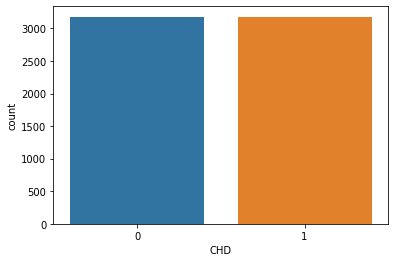

In [106]:
#Visualize the distribution using seaborn
sns.countplot(x=Y_os)
plt.show()

In [107]:
#new os (oversampling) dataframe
df_os = pd.DataFrame(X_os)
df_os['CHD'] = Y_os

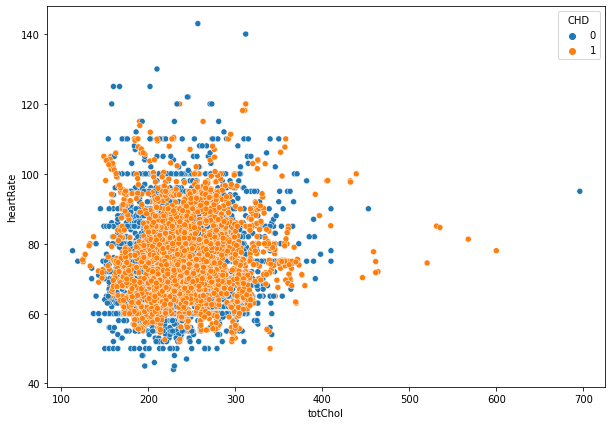

In [108]:
#Visualizing using scatter plot
plt.figure(figsize=(10,7))
sns.scatterplot(data= df_os, x='totChol', y='heartRate', hue='CHD')
plt.show()

### Feature Selection

In [109]:
# Find the attributes that are most important for the outcome variable, heart (cardiovascular) disease.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# isolate independent and dependent variables
X = df_fhs.iloc[:,0:14]  #independent columns
y = df_fhs.iloc[:,-1]    #target column i.e price range

# Using the SelectKBest class to find the top ten best characteristics.
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#combine two dataframes for improved visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

            Specs    Score
11            BMI 7194.424
3      cigsPerDay 6286.831
0          Gender 2081.000
8         totChol  143.925
12      heartRate   94.375
2   currentSmoker   79.248
9           sysBP   27.286
10          diaBP   18.697
4          BPMeds    9.969
1             age    3.238
7        diabetes    0.511


In [110]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
11,BMI,7194.424
3,cigsPerDay,6286.831
0,Gender,2081.000
8,totChol,143.925
12,heartRate,94.375
2,currentSmoker,79.248
9,sysBP,27.286
10,diaBP,18.697
4,BPMeds,9.969
1,age,3.238


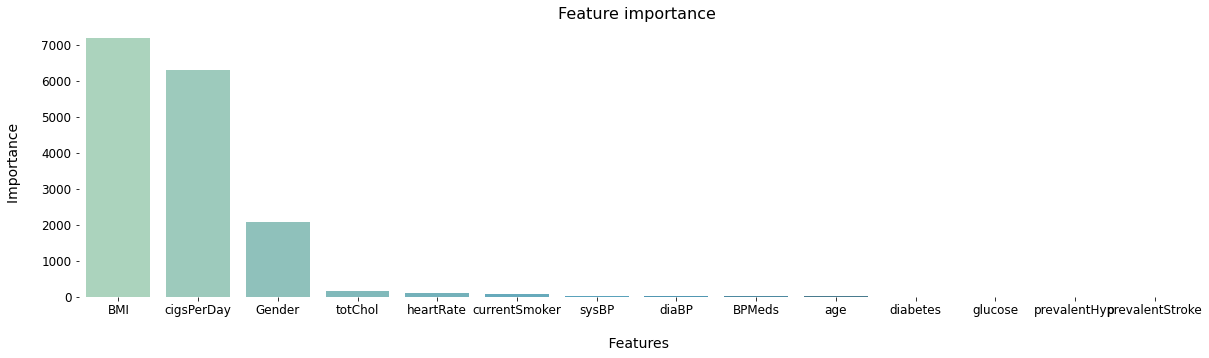

In [111]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [112]:
df_fhs['Gender'] = df_fhs['Gender'].replace({0:'Female', 1:'Male'}) #0 = Female; 1 = Male
df_fhs.head()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD,Gender_Cat
0,Male,39,0,0.000,0.000,0,0,0,195.000,106.000,70.000,722,80.000,77.000,0,Male
1,Female,46,0,0.000,0.000,0,0,0,250.000,121.000,81.000,869,95.000,76.000,0,Female
2,Male,48,1,20.000,0.000,0,0,0,245.000,127.500,80.000,570,75.000,70.000,0,Male
3,Female,61,1,30.000,0.000,0,1,0,225.000,150.000,95.000,856,65.000,103.000,1,Female
4,Female,46,1,23.000,0.000,0,0,0,285.000,130.000,84.000,364,85.000,85.000,0,Female


In [113]:
fhs_quant_df = df_fhs.select_dtypes(include=np.number)
fhs_quant_df.columns.tolist()

['age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'CHD']

In [114]:
fhs_df_MLR = df_fhs[['Gender','age', 'diabetes', 'currentSmoker', 'BMI',
                     'cigsPerDay', 'sysBP', 'totChol', 'glucose', 'CHD']]

In [115]:
#use only quant variables and drop any rows with missing values for explanatory variables
num_vars = fhs_df_MLR.fillna(0)

#### 2nd Spliting (testing & training)

In [116]:
#split into explanatory and response variables
X = num_vars[['age', 'sysBP', 'currentSmoker', 'totChol', 'diabetes']]
Y = num_vars['CHD']

In [117]:
# splitting data into testing & training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state=42)

In [118]:
#Instantize LR model
from sklearn.linear_model import LogisticRegression
mlr_model = LogisticRegression()

In [119]:
#Fit model
mlr_model.fit(X_test, Y_test)

LogisticRegression()

In [120]:
#Score model's accuracy
print("The Score model's accuracy score achieved is: "+ str(mlr_model.score(X_test, Y_test)))

The Score model's accuracy score achieved is: 0.8357015985790408


In [121]:
# Model fit and summary
import statsmodels.api as sm
mlr_model=sm.Logit(Y_test, X_test)
result_gen=mlr_model.fit()
print(result_gen.summary2())

Optimization terminated successfully.
         Current function value: 0.458574
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.017   
Dependent Variable: CHD              AIC:              1042.7086
Date:               2023-05-03 15:51 BIC:              1067.8407
No. Observations:   1126             Log-Likelihood:   -516.35  
Df Model:           4                LL-Null:          -507.87  
Df Residuals:       1121             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
age               0.0196   0.0093  2.1096 0.0349  0.0014  0.0379
sysBP            -0.0054   0.0035 -1.5508 0.1210 -0.0122  0.0014
currentSmoker

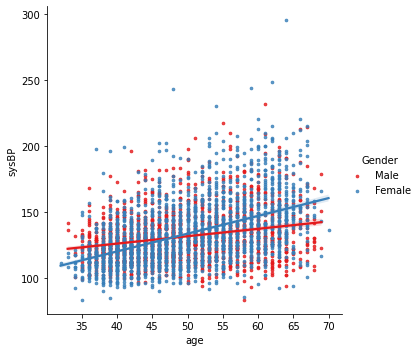

In [122]:
sns.lmplot( x="age", y="sysBP", data=df_fhs, fit_reg=True, hue='Gender', legend=True, palette="Set1", scatter_kws={"s": 7})

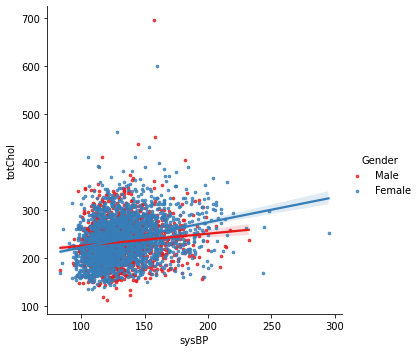

In [123]:
sns.lmplot( x="sysBP", y="totChol", data=df_fhs, fit_reg=True, hue='Gender', legend=True, palette="Set1", scatter_kws={"s": 7})
